In [1]:
from lbmpy.session import *
from lbmpy.phasefield.analytical import *
from pystencils.fd import evaluate_diffs

# Analytical checks for 3-Phase model

Here you can inspect the components of the free energy. View only bulk or interface contributions, before and after transformation from $U \rightarrow (\rho, \phi,\psi)$:

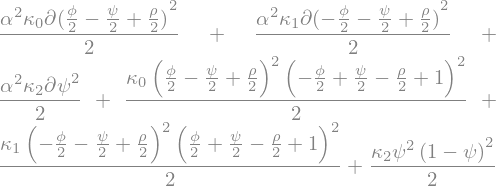

In [2]:
order_parameters = sp.symbols("rho phi psi")
rho, phi, psi = order_parameters
F, _ = free_energy_functional_3_phases(include_bulk=True,
                                       include_interface=True,
                                       transformed=True,
                                       expand_derivatives=False)
F

### Analytically checking the phase transition profile


Automatically deriving chemical potential as functional derivative of free energy

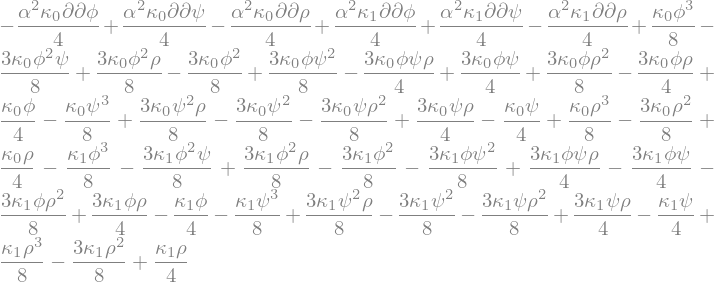

In [3]:
F, _ = free_energy_functional_3_phases(order_parameters)

mu_diff_eq = chemical_potentials_from_free_energy(F, order_parameters)
mu_diff_eq[0]

Checking if expected profile is a solution of the differential equation:

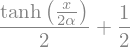

In [4]:
x = sp.symbols("x")
expectedProfile = analytic_interface_profile(x)
expectedProfile


Checking a phase transition from $C_0$ to $C_2$. This means that $\rho=1$ while $phi$ and $psi$ are the analytical profile or 1-analytical profile

In [5]:
for eq in mu_diff_eq:
    eq = eq.subs({rho: 1,
                  phi: 1 - expectedProfile,
                  psi: expectedProfile})
    eq = evaluate_diffs(eq, x).expand()
    assert eq == 0

### Checking the surface tensions parameters


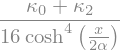

In [6]:
F, _ = free_energy_functional_3_phases(order_parameters)
F = expand_diff_linear(F, functions=order_parameters)  # expand derivatives using product rule
two_phase_free_energy = F.subs({rho: 1,
                                phi: 1 - expectedProfile,
                                psi: expectedProfile})

two_phase_free_energy = sp.simplify(evaluate_diffs(two_phase_free_energy, x))
two_phase_free_energy

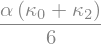

In [7]:
gamma = cosh_integral(two_phase_free_energy, x)
gamma

In [8]:
alpha, k0, k2 = sp.symbols("alpha, kappa_0, kappa_2")
assert gamma == alpha/6 * (k0 + k2)